In [1]:
# takes 5m for 2m records. Perform experiments to determine metrics. Lots of charts.
# uses examples from: https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b

# todo:

# next steps:
# acbl_hand_records_evaluation_experiments.ipynb creates acbl_hand_records_evaluated.pkl
# merge-hand-records.ipynb merges acbl and tcg standardized hand records?

# previous steps:
# acbl_hand_records_dd_train_probabilities_fastai.ipynb creates model to predict expected probabilites of contracts.
# acbl_hand_records_dd_experiments.ipynb creates acbl_hand_records_dd.pkl

# Requirements
# https://github.com/Afwas/python-dds with some of my mods.
# If pickle errors: pip install --upgrade pandas

In [32]:
import pandas as pd
import pathlib
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import display # needed to define display() method in vscode
import sys
import sklearn.metrics

In [29]:
sys.path.append(str(pathlib.Path.cwd().parent.joinpath('mlBridgeLib')))
sys.path
import mlBridgeLib

In [30]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
savedModelsPath = acblPath.joinpath('SavedModels')
savedModelsPath.mkdir(parents=True, exist_ok=True)

In [6]:
# takes 30s
# read model parameters
acbl_hand_records_dd_train_probabilities_filename = 'acbl_hand_records_dd_train_probabilities.pkl'
print(f'Reading model parameters from file:{acbl_hand_records_dd_train_probabilities_filename}')
acbl_hand_records_dd_train_probabilities_file = acblPath.joinpath(acbl_hand_records_dd_train_probabilities_filename)
augmented_df,df,valid_idx,test_df,y_names,cont_names,cat_names = pd.read_pickle(acbl_hand_records_dd_train_probabilities_file)

Reading model parameters from file:acbl_hand_records_dd_train_probabilities.pkl


In [127]:
hcp_dd_cm = pd.crosstab(augmented_df['HCP_NS'], augmented_df['DD_N_N'], normalize='index')
hcp_dd_cm

DD_N_N,0,1,2,3,4,5,6,7,8,9,10,11,12,13
HCP_NS,,,,,,,,,,,,,,
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.97,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.88,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.79,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.66,0.33,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.52,0.43,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.37,0.51,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.26,0.49,0.22,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [145]:
hcp_dd_cm.describe()

DD_N_N,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,0.17,0.09,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.05,0.07,0.18
std,0.32,0.16,0.12,0.10,0.09,0.09,0.09,0.09,0.09,0.08,0.09,0.10,0.15,0.35
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.13,0.10,0.05,0.03,0.03,0.03,0.04,0.04,0.04,0.02,0.02,0.02,0.04,0.12
max,1.00,0.51,0.39,0.34,0.32,0.31,0.32,0.31,0.31,0.30,0.31,0.36,0.52,1.00


In [135]:
import seaborn as sns
def plot_heatmap(cross_table, fmt='.2f'):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show()

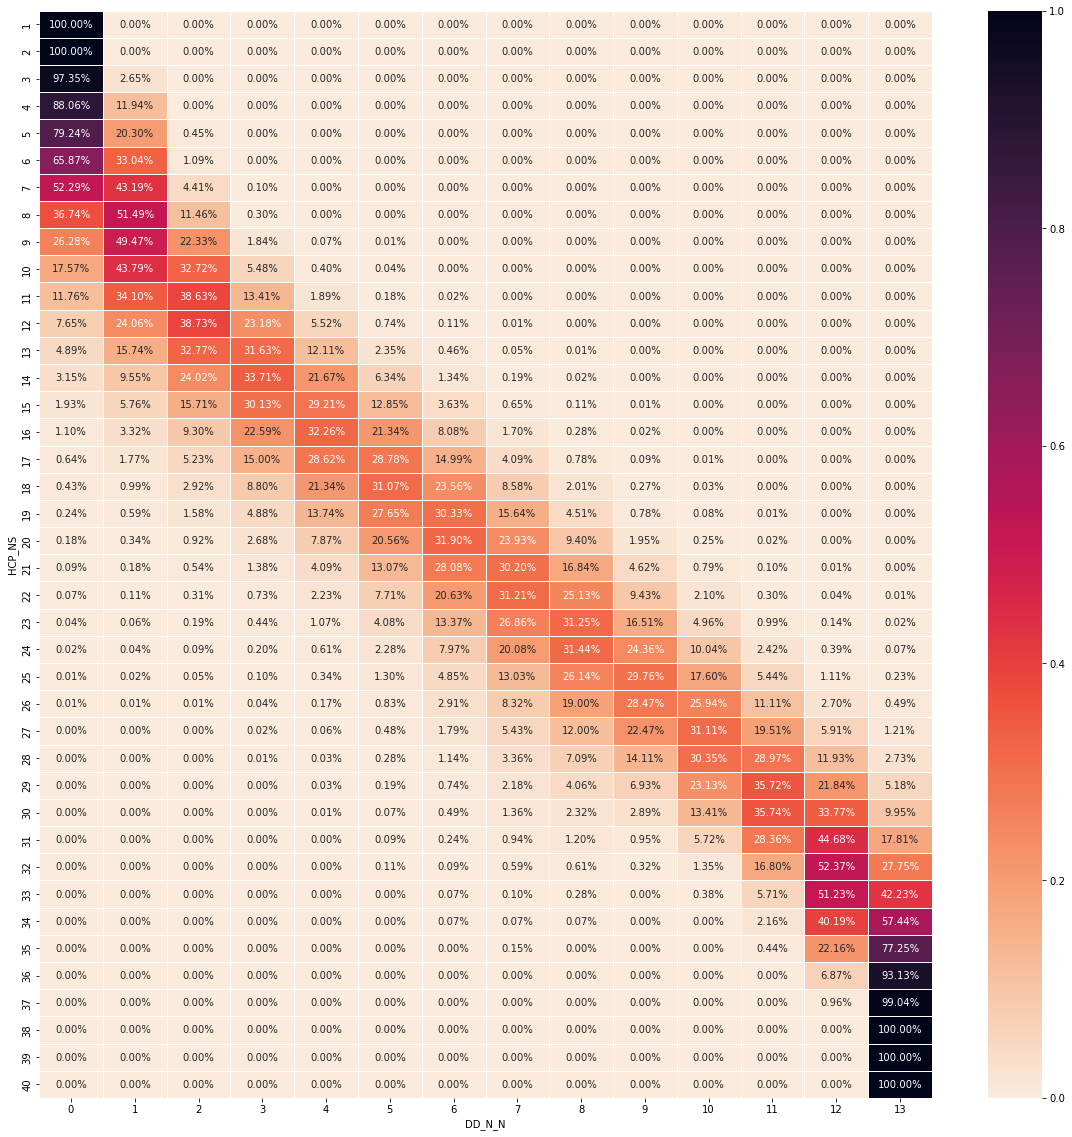

In [136]:
plot_heatmap(hcp_dd_cm,fmt='.2%')

In [130]:
# Create pivot table of showing mean DD tricks given HCP_NS and QT_NS. Default is aggfunc=np.mean().
hcp_qt_dd = augmented_df.pivot_table(
    values='DD_N_N',
    index='HCP_NS',
    columns='QT_NS')
hcp_qt_dd

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
HCP_NS,,,,,,,,,,,,,,,,,
1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06,0.20,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.14,0.22,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.22,0.33,0.59,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.41,0.46,0.65,0.68,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.61,0.68,0.80,0.93,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.92,0.88,0.99,1.11,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# Create pd.crosstab showing mean DD tricks given HCP_NS and QT_NS.
hcp_qt_dd = pd.crosstab(
    index=augmented_df['HCP_NS'],
    columns=augmented_df['QT_NS'],
    values=augmented_df['DD_N_N'],
    aggfunc=np.mean)
hcp_qt_dd

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
HCP_NS,,,,,,,,,,,,,,,,,
1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06,0.20,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.14,0.22,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.22,0.33,0.59,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.41,0.46,0.65,0.68,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.61,0.68,0.80,0.93,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.92,0.88,0.99,1.11,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# using groupby() which is faster than pivot_table and crosstab
hcp_qt_dd = augmented_df.groupby(['HCP_NS', 'QT_NS'])['DD_N_N'].mean().unstack()
hcp_qt_dd

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
HCP_NS,,,,,,,,,,,,,,,,,
1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06,0.20,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.14,0.22,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.22,0.33,0.59,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.41,0.46,0.65,0.68,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.61,0.68,0.80,0.93,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.92,0.88,0.99,1.11,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


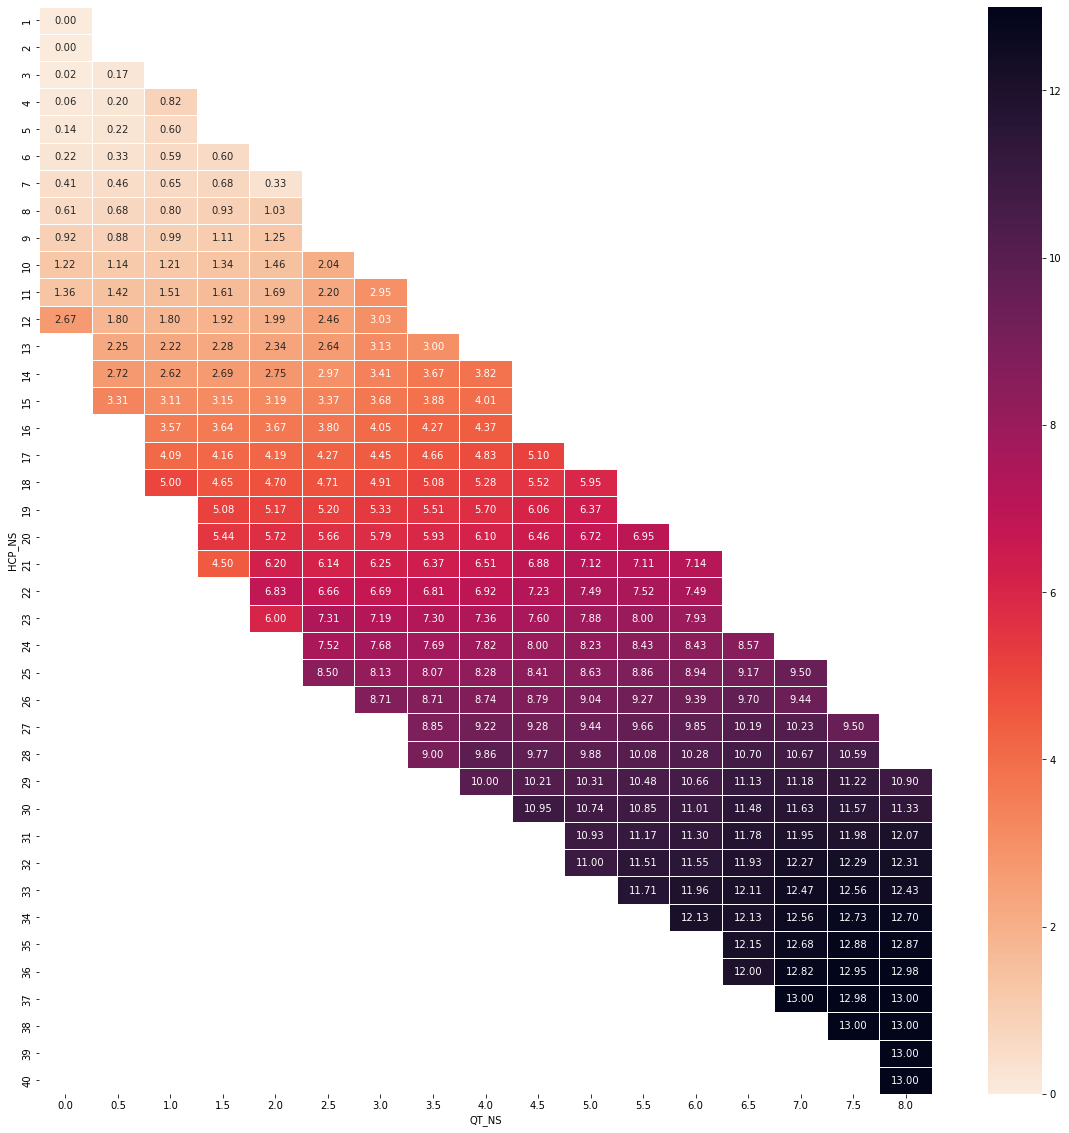

In [137]:
# nice. heatmap shows mean DD tricks given hcp and qt.
plot_heatmap(hcp_qt_dd)

<AxesSubplot:title={'center':'Frequency of HCP vs DD'}, xlabel='HCP_NS'>

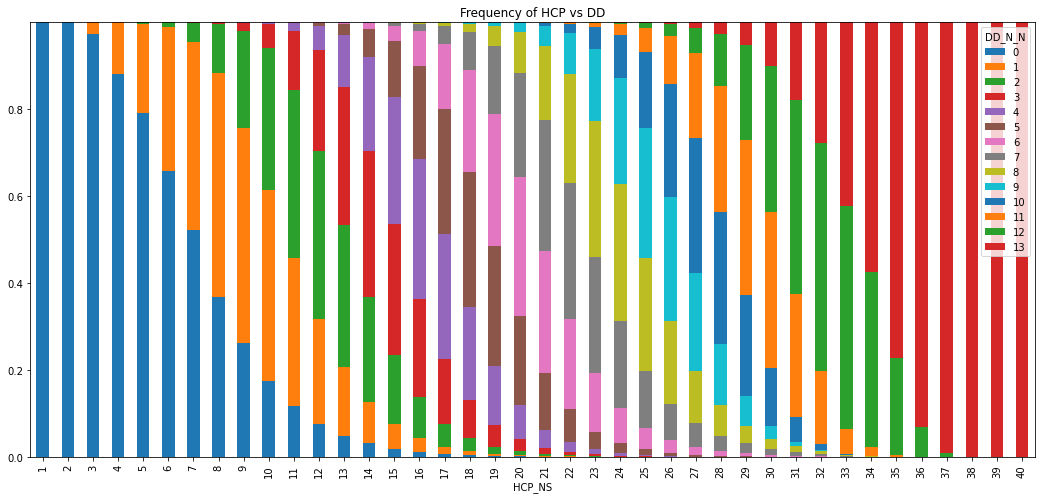

In [68]:
# not as obvious as heatmap
hcp_dd_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of HCP vs DD')

In [70]:
qt_dd_cm = pd.crosstab(augmented_df['QT_NS'], augmented_df['DD_N_N'], normalize='index')
qt_dd_cm

DD_N_N,0,1,2,3,4,5,6,7,8,9,10,11,12,13
QT_NS,,,,,,,,,,,,,,
0.00,0.59,0.31,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.50,0.31,0.40,0.20,0.07,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1.00,0.14,0.36,0.28,0.14,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1.50,0.06,0.22,0.29,0.22,0.13,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2.00,0.04,0.10,0.23,0.24,0.20,0.12,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2.50,0.02,0.03,0.11,0.21,0.24,0.21,0.13,0.04,0.01,0.00,0.00,0.00,0.00,0.00
3.00,0.01,0.01,0.04,0.13,0.20,0.25,0.22,0.11,0.03,0.01,0.00,0.00,0.00,0.00
3.50,0.00,0.00,0.01,0.05,0.12,0.21,0.27,0.20,0.10,0.03,0.01,0.00,0.00,0.00
4.00,0.00,0.00,0.01,0.02,0.06,0.13,0.22,0.25,0.18,0.09,0.03,0.00,0.00,0.00


<AxesSubplot:title={'center':'Frequency of QT vs DD'}, xlabel='QT_NS'>

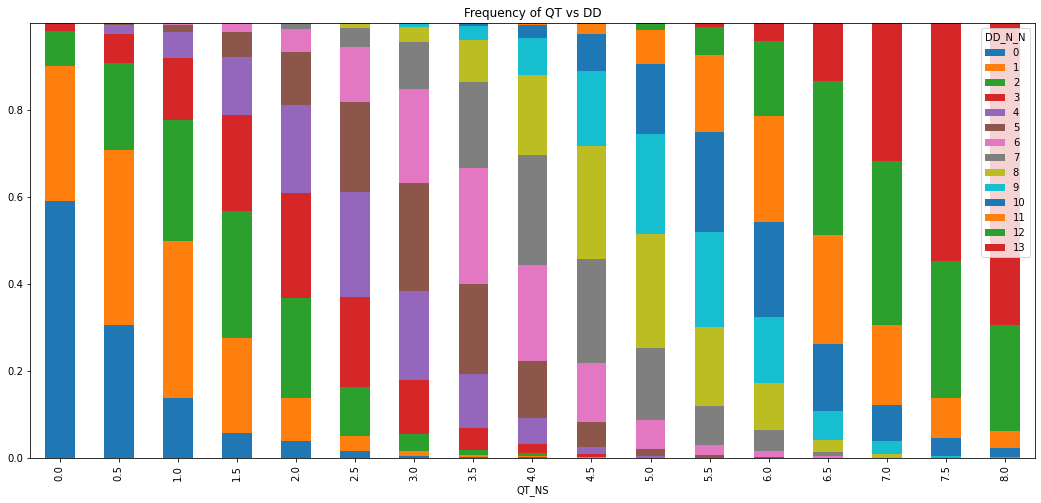

In [72]:
qt_dd_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of QT vs DD')

In [73]:
dd_qt_cm = pd.crosstab(augmented_df['DD_N_N'], augmented_df['QT_NS'], normalize='index')
dd_qt_cm

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
DD_N_N,,,,,,,,,,,,,,,,,
0,0.08,0.16,0.20,0.16,0.20,0.11,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.02,0.09,0.23,0.27,0.21,0.10,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.03,0.11,0.22,0.30,0.20,0.09,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.01,0.04,0.12,0.23,0.27,0.21,0.09,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.01,0.06,0.15,0.25,0.26,0.17,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.02,0.07,0.18,0.27,0.24,0.15,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.01,0.03,0.10,0.21,0.27,0.22,0.11,0.04,0.01,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.01,0.04,0.11,0.21,0.27,0.21,0.11,0.04,0.01,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.12,0.23,0.27,0.20,0.09,0.03,0.00,0.00,0.00,0.00


<AxesSubplot:title={'center':'Frequency of DD vs QT'}, xlabel='DD_N_N'>

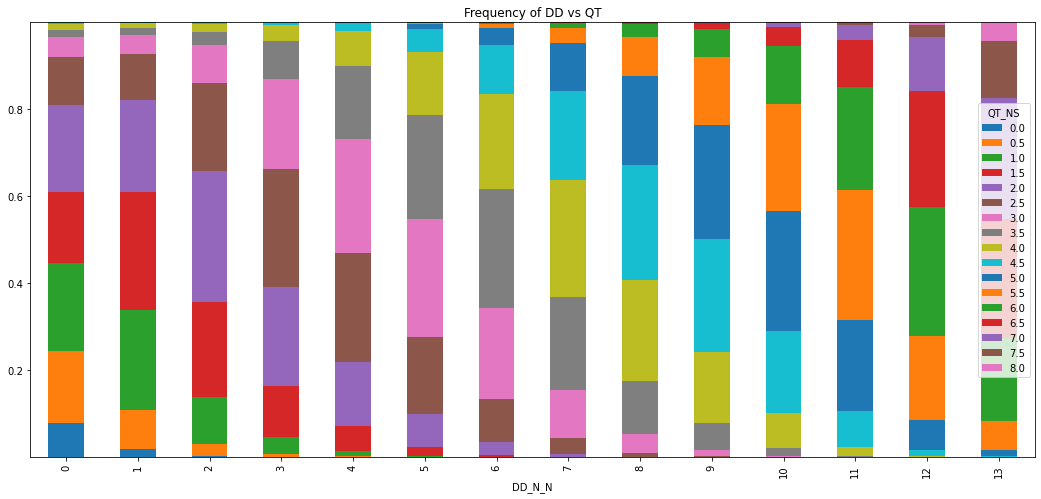

In [77]:
dd_qt_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of DD vs QT')

In [79]:
hcp_qt_cm = pd.crosstab(augmented_df['HCP_NS'], augmented_df['QT_NS'], normalize='index')
hcp_qt_cm

QT_NS,0.00,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00,5.50,6.00,6.50,7.00,7.50,8.00
HCP_NS,,,,,,,,,,,,,,,,,
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.95,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.76,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.54,0.37,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.36,0.40,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.21,0.42,0.33,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.11,0.35,0.40,0.12,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.05,0.25,0.42,0.22,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<AxesSubplot:title={'center':'Frequency of DD vs QT'}, xlabel='HCP_NS'>

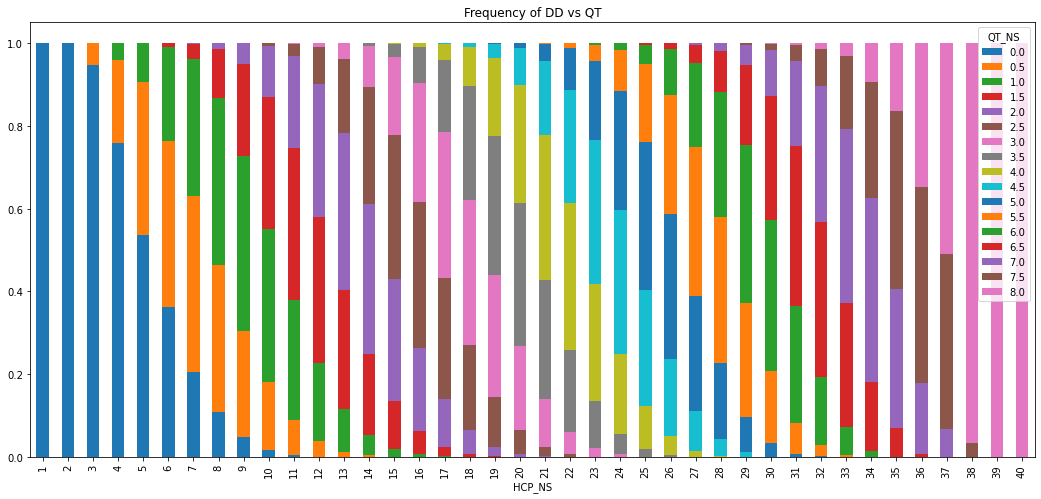

In [80]:
hcp_qt_cm.plot(kind='bar', stacked=True, figsize=(18,8), title='Frequency of DD vs QT')